# Importing libraries

In [2]:
#conda update astropy
import numpy as np
import torch
from astropy.io import fits                            # Opens .fits files
import numpy as np                                     
import matplotlib.pyplot as plt                        # For data visualization
from mpl_toolkits.mplot3d import Axes3D                # For 3D data visualization
import seaborn as sns                                  # For graphs aesthetics

# Embeds plots inside the Notebook
%matplotlib inline                                     

# Opening files and assigning variables to magnitudes

In [3]:
andr=fits.open('models/andres_models_heq.fits')

In [4]:
andr.info()

Filename: models/andres_models_heq.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   (61, 288, 288, 12)   float64   


In [5]:
# Opening files and seeing their content

f1 = fits.open('models/ivan_models.fits')                     # Opens files
f2 = fits.open('models/ivan_models_synth.fits')

f1.info()                                              # File information
print('')
f2.info()
print('')
print("Mags shape: {}".format(f1[0].data.shape))
print("Stokes shape: {}".format(f2[0].data.shape))

Filename: models/ivan_models.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   (61, 288, 288, 12)   float64   

Filename: models/ivan_models_synth.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   (601, 4, 288, 288)   float64   

Mags shape: (12, 288, 288, 61)
Stokes shape: (288, 288, 4, 601)


In [6]:
mags = fits.open('models/ivan_models.fits')[0].data              # Cubes of magnitudes
stokes = fits.open('models/ivan_models_synth.fits')[0].data      # Stokes' cube

mags = np.delete(mags, [0,1,4,5,6], axis=0)
nmags,nz1,nx1,ny1 = mags.shape
nz2, nx2, nstokes, ny2 = stokes.shape

# Taking the cubes and naming each one with the corresponding magnitude

              
temp = mags[0]                  # Temperature
micvel = mags[3]                # Microturbulent velocity
tp = mags[1]                    # Total preassure
vel = mags[4]                   # Velocity
b = mags[2]                     # Magnitude of the magnetic fiel
b_inc = mags[5]                # Magnetic field inclination
b_az = mags[6]                 # Magnetic field azimuth


I = stokes[:,:,0,:]               # Intensity
Q = stokes[:,:,1,:]               # Stokes parameter Q
U = stokes[:,:,2,:]               # Stokes parameter U
V = stokes[:,:,3,:]               # Stokes parameter V


# Data structure test

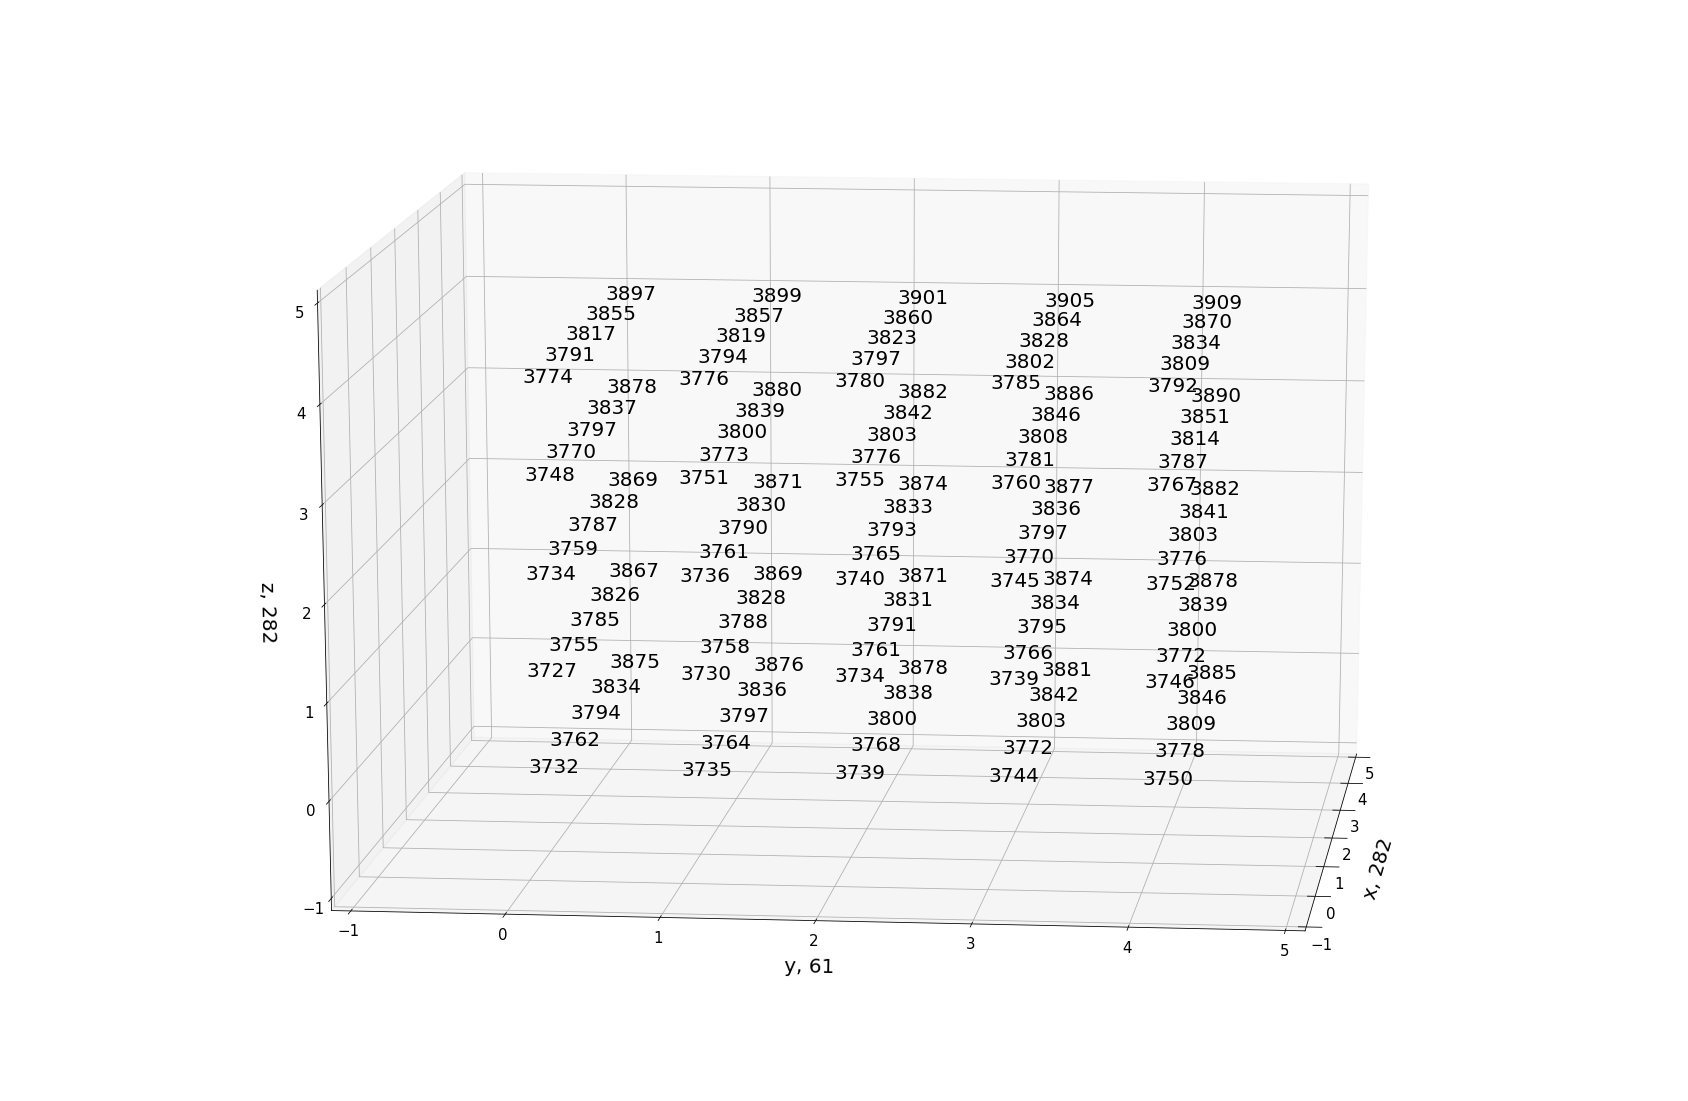

In [7]:
# Plotting a subcube of temperature (column 2) for better understanding

fig = plt.figure(figsize=(30, 20))            # Figure size
ax =  fig.gca(projection='3d')                # Declares that this will be a 3D plot

# Takes each temperature value (string) to its correct location ((x,y,z))
for a in np.arange(5):
    for b in np.arange(5):
        for c in np.arange(5):
            ax.text(x = a, y = c, z = b, s = str(int(temp[a,b,c])), fontsize=20)

# Just aesthetics
ax.set_xlim(-1, 5), ax.set_ylim(-1, 5), ax.set_zlim(-1, 5)
ax.set_zlabel("z, 282", fontsize=20, labelpad=15), ax.set_xlabel("x, 282", fontsize=20, labelpad=15), ax.set_ylabel("y, 61", fontsize=20,labelpad=20)
ax.tick_params(axis="x", labelsize=15), ax.tick_params(axis="y", labelsize=15),ax.tick_params(axis="z", labelsize=15)
ax.view_init(elev=14., azim=6)
ax.invert_xaxis()
plt.show()

# Defining Plots

In [8]:
# When called, plots the ZX plane at three given Y's (heights)

def plot_cut(h, mag):
    sns.set(font_scale=2)
    sns.set_style("white")
    
    print('ZX plane')

    plt.figure(figsize=(60, 40))

    for i in np.arange(3):
        plt.subplot(1,3,i+1)
        plt.imshow(mag[:,:,h[i]], cmap='gray')
        plt.title("y = %s"%h[i])
        plt.colorbar(fraction=0.046)

    plt.tight_layout(pad=1, w_pad=5)
    plt.show()

    
    
# When called, plots the ZY plane at three given X's (depths)

def plot_profile(d, mag):
    sns.set(font_scale=1.5)
    sns.set_style("white")
    
    print('ZY plane')

    plt.figure(figsize=(20, 8))
    
    for i in np.arange(3):
        plt.subplot(1,3,i+1)
        plt.imshow(mag[d[i],:,:], cmap='gray')
        plt.title("x = %s"%d[i])
        plt.colorbar()

    plt.tight_layout(pad=1, w_pad=4)
    
    
    
# When called, plots a given magnitude vs y-axis

def plot_mag_vs_y(z,x, mag, N, mag_label):
    
    print('%s'% mag_label)
    
    fig = plt.figure(figsize=(20,N))
    
    for i in np.arange(N):
        fig.add_subplot(np.ceil(N/4),4,i+1)
        plt.plot(mag[z[i], x[i],:])
        plt.title('z=%s, x=%s'% (z[i],x[i]))
        plt.xlabel('y')
#       plt.ylabel('%s' % mag_label)

    plt.tight_layout(pad=1, w_pad=3, h_pad=2)
    plt.show()
    

# ZX plane plots

ZX plane


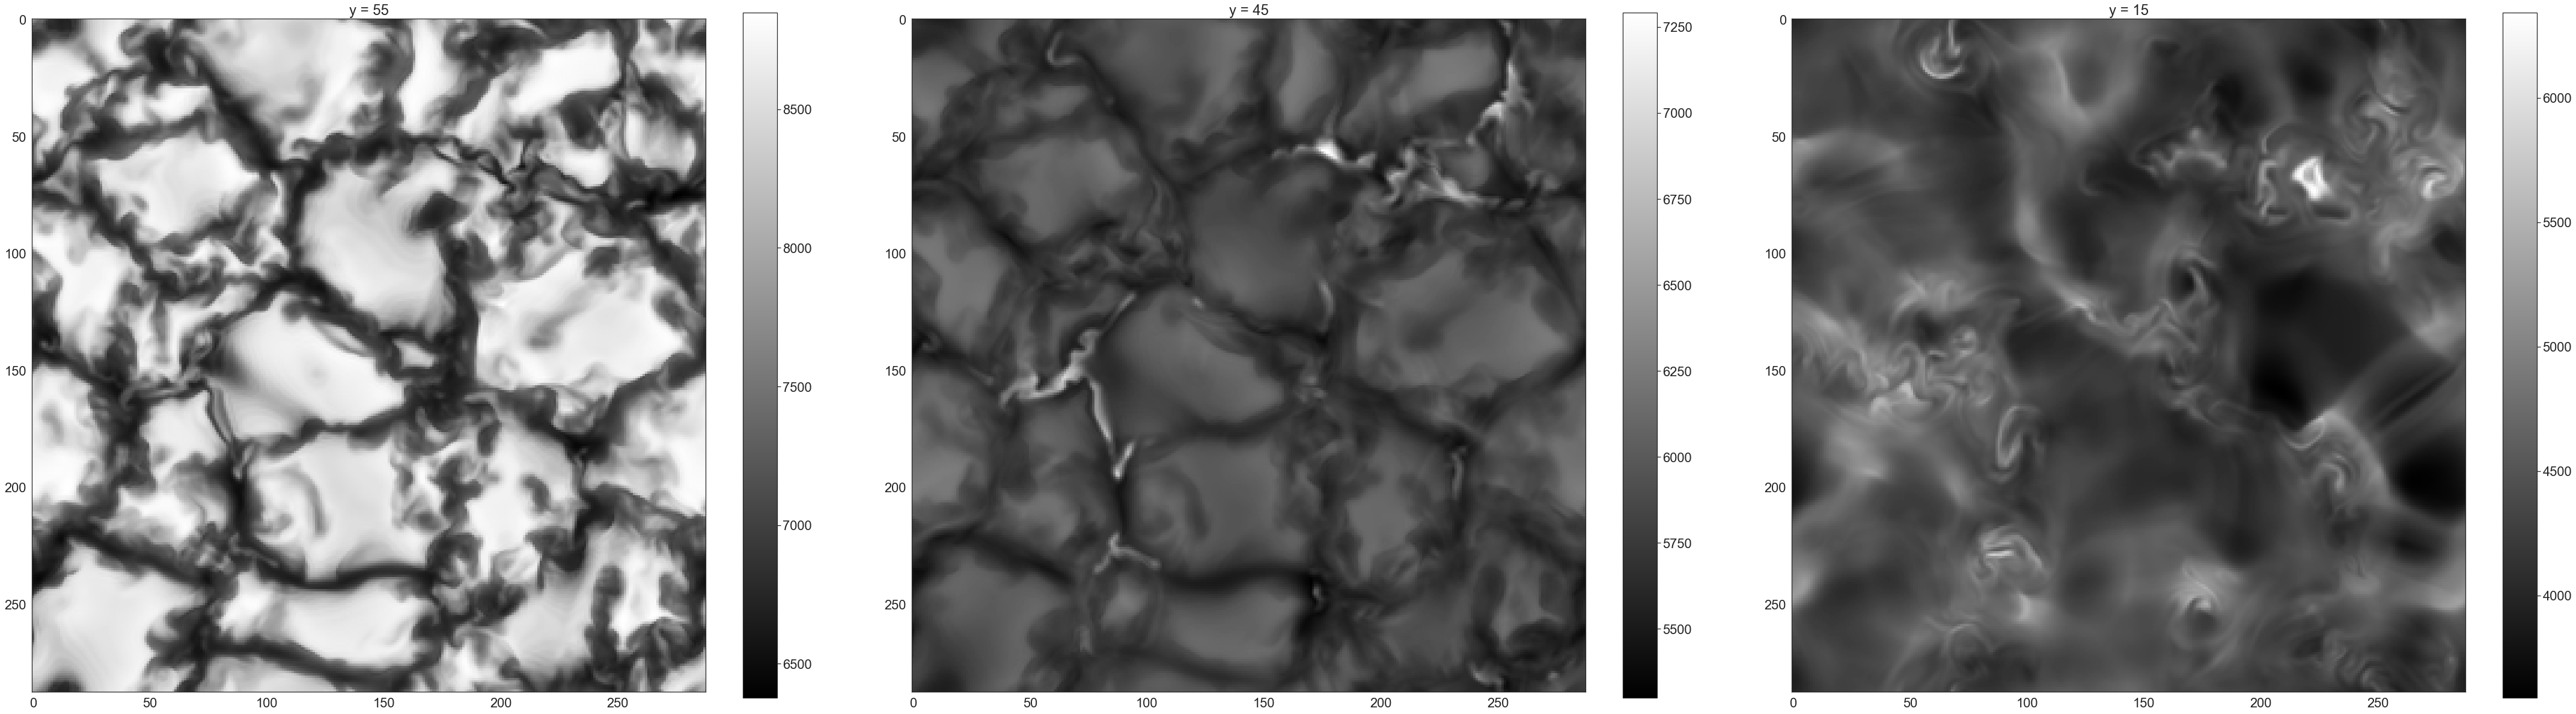

ZX plane


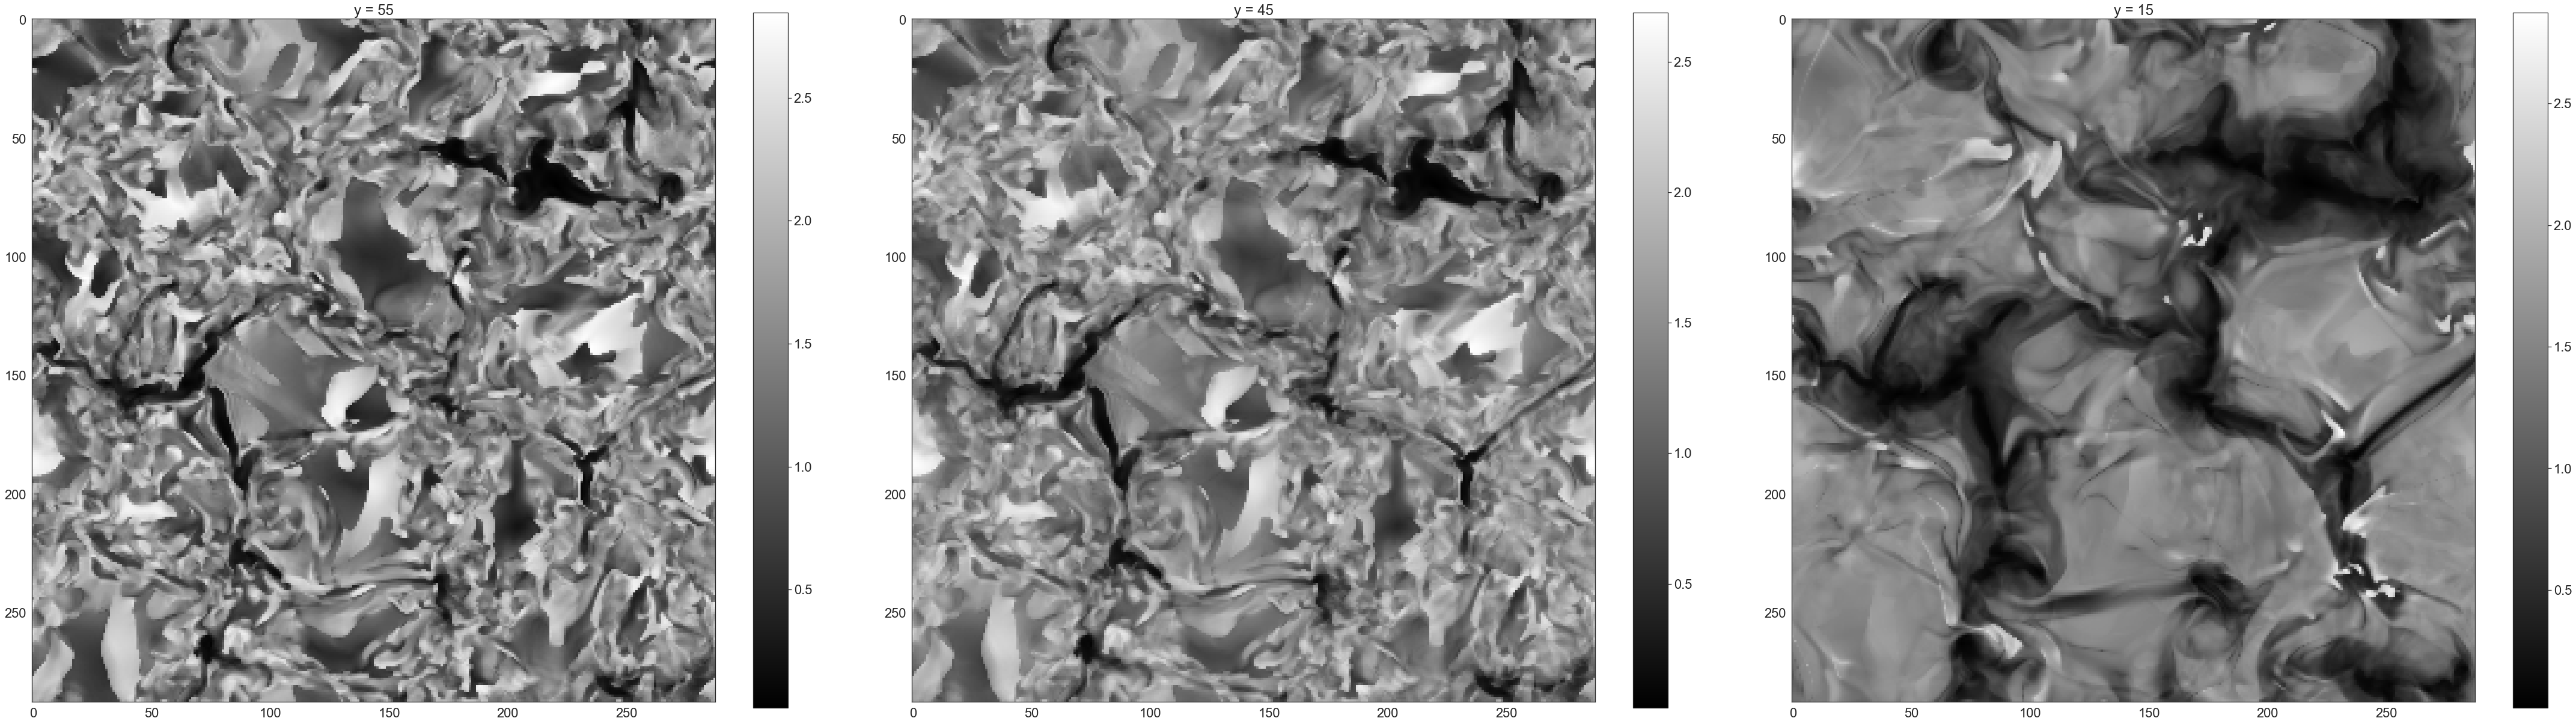

In [13]:
# zx plane plots

plot_cut([55, 45,15],temp)
#plot_cut([55, 45,15],micvel)
#plot_cut([55, 45,15, tp)
#plot_cut([55, 45,15, vel)
#plot_cut([55, 45,15, b)
plot_cut([55, 45,15], b_inc)
#plot_cut([55, 45,15, b_az)
#plot_cut([55, 45,15], Q)

# ZY plane plots

ZY plane
ZY plane


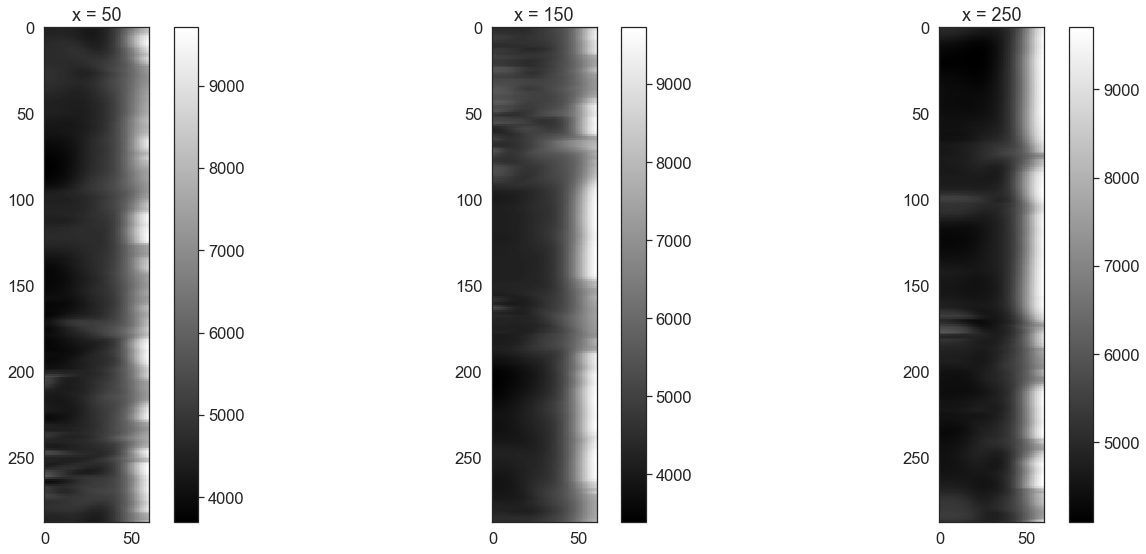

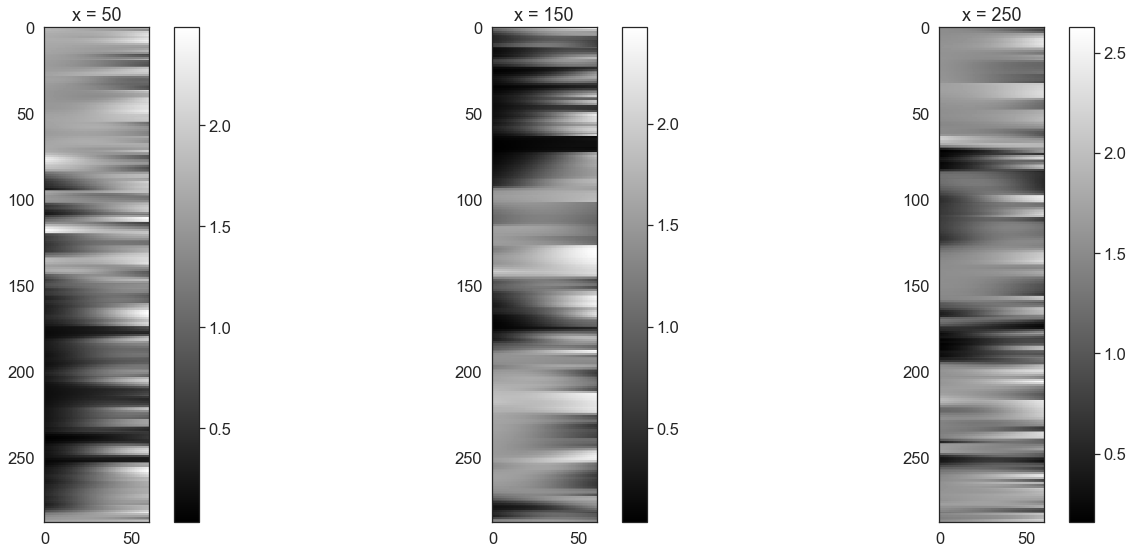

In [15]:
# zy plane plots

plot_profile([50, 150, 250], temp)
#plot_profile([50, 150, 250], tp)
#plot_profile([50, 150, 250], vel)
#plot_profile([50, 150, 250], b)
plot_profile([50, 150, 250], b_inc)
#plot_profile([50, 150, 250], b_az)

# Magnitude vs Y-axis plots

Temperature


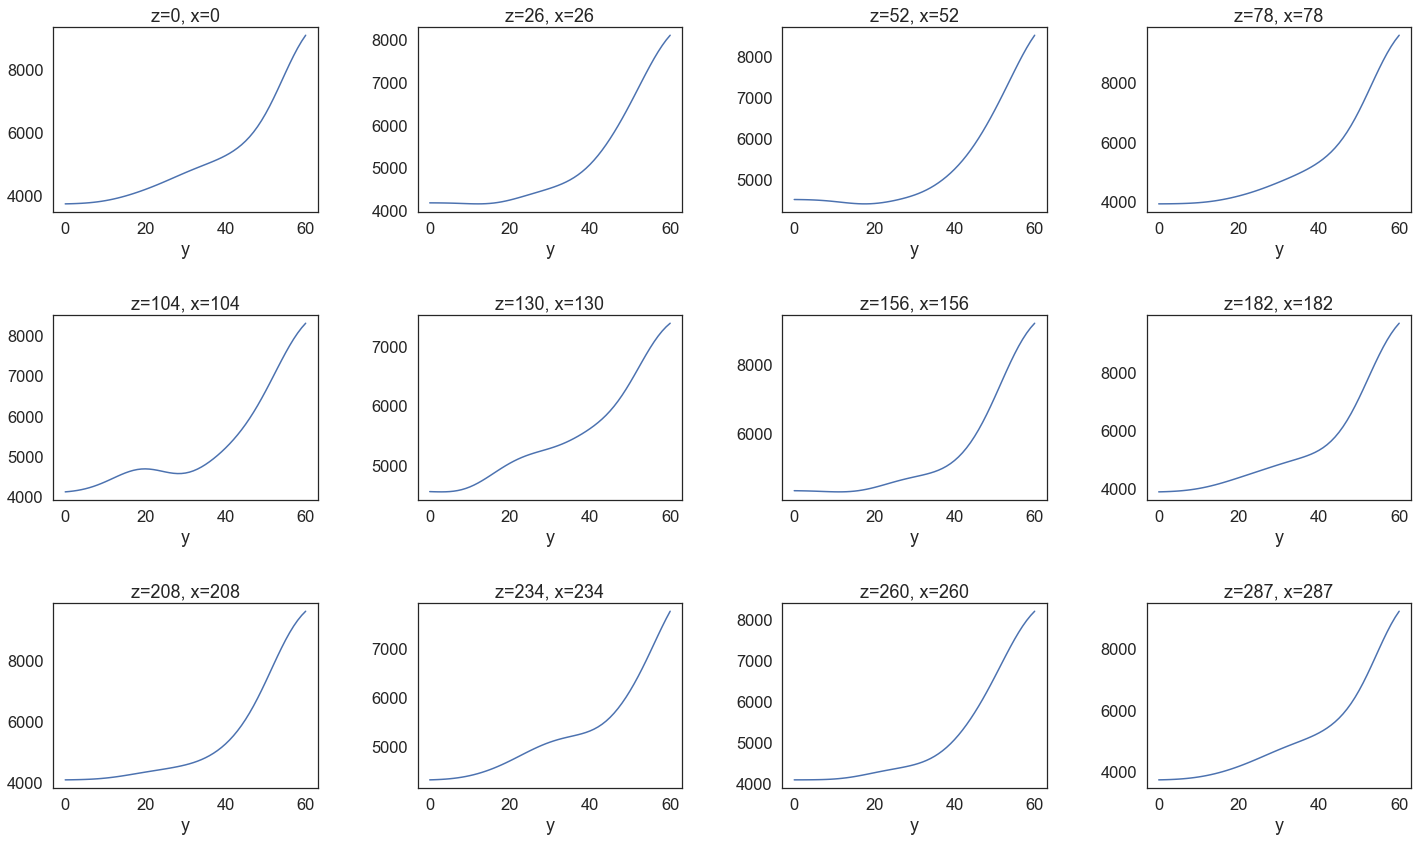

Magnetic field inclination


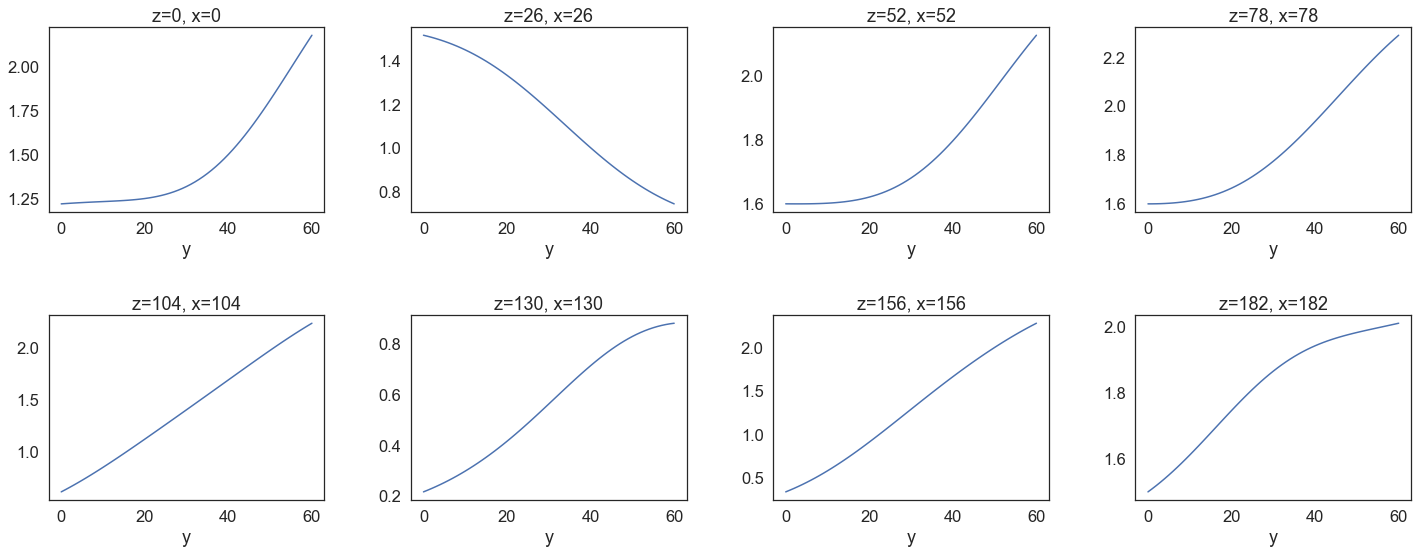

In [16]:
z= np.linspace(0,287,12,dtype=int)
x=z  

plot_mag_vs_y(z, x, temp, 12, 'Temperature')
#plot_mag_vs_y(z, x, tp, 4, 'Total preassure')
#plot_mag_vs_y(z, x, I, 4, 'Intensity')
#plot_mag_vs_y(z, x, Q, 4, 'Stokes parameter Q')
#plot_mag_vs_y(z, x, U, 4, 'Stokes parameter U')
#plot_mag_vs_y(z, x, V, 4, 'Stokes parameter V')
#plot_mag_vs_y(z, x, b, 8, 'Magnetic field')
#plot_mag_vs_y(z, x, vel, 8, 'Velocity')
plot_mag_vs_y(z, x, b_inc, 8, 'Magnetic field inclination')
#plot_mag_vs_y(z, x, b_az, 4, 'Magnetic field azimuth')

## Magnitude vs Y (one example of each)

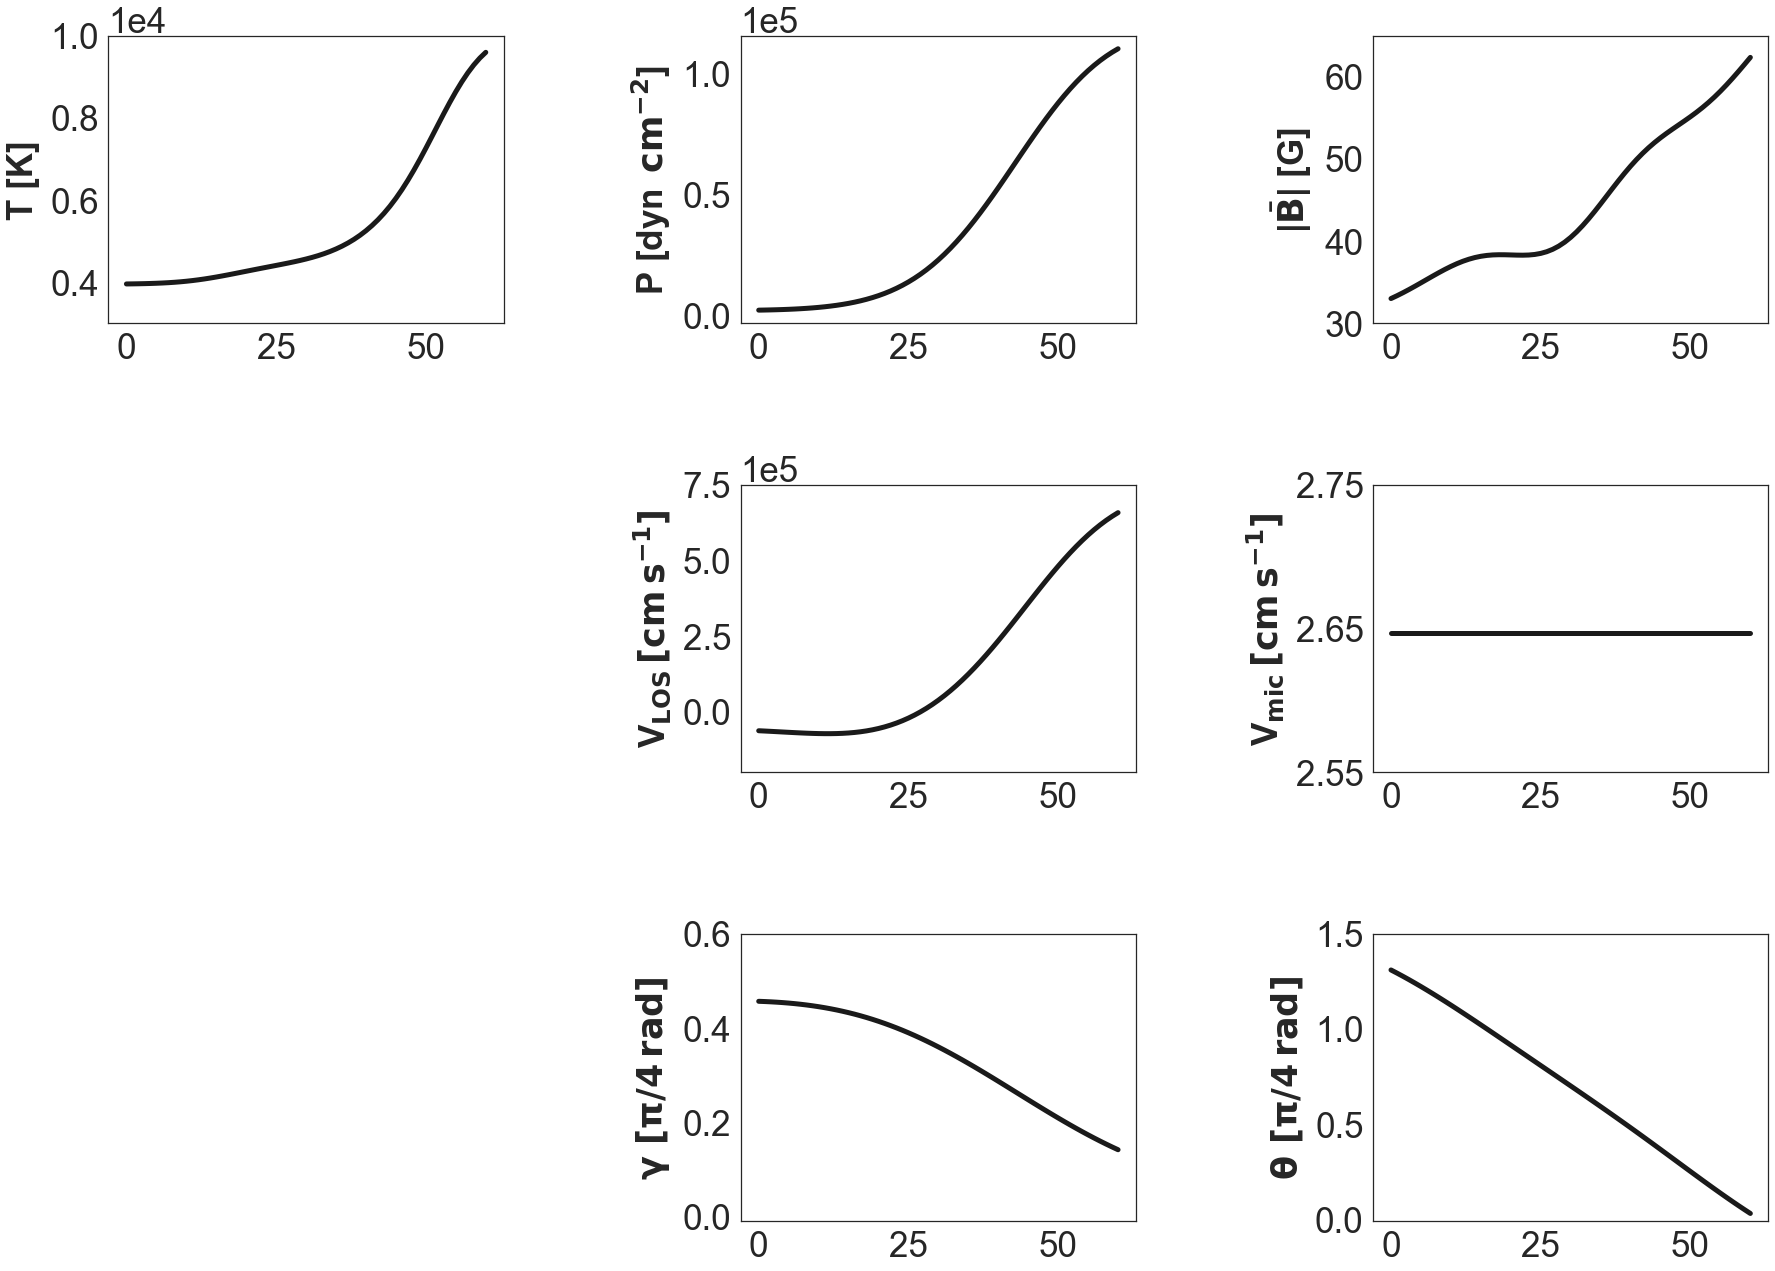

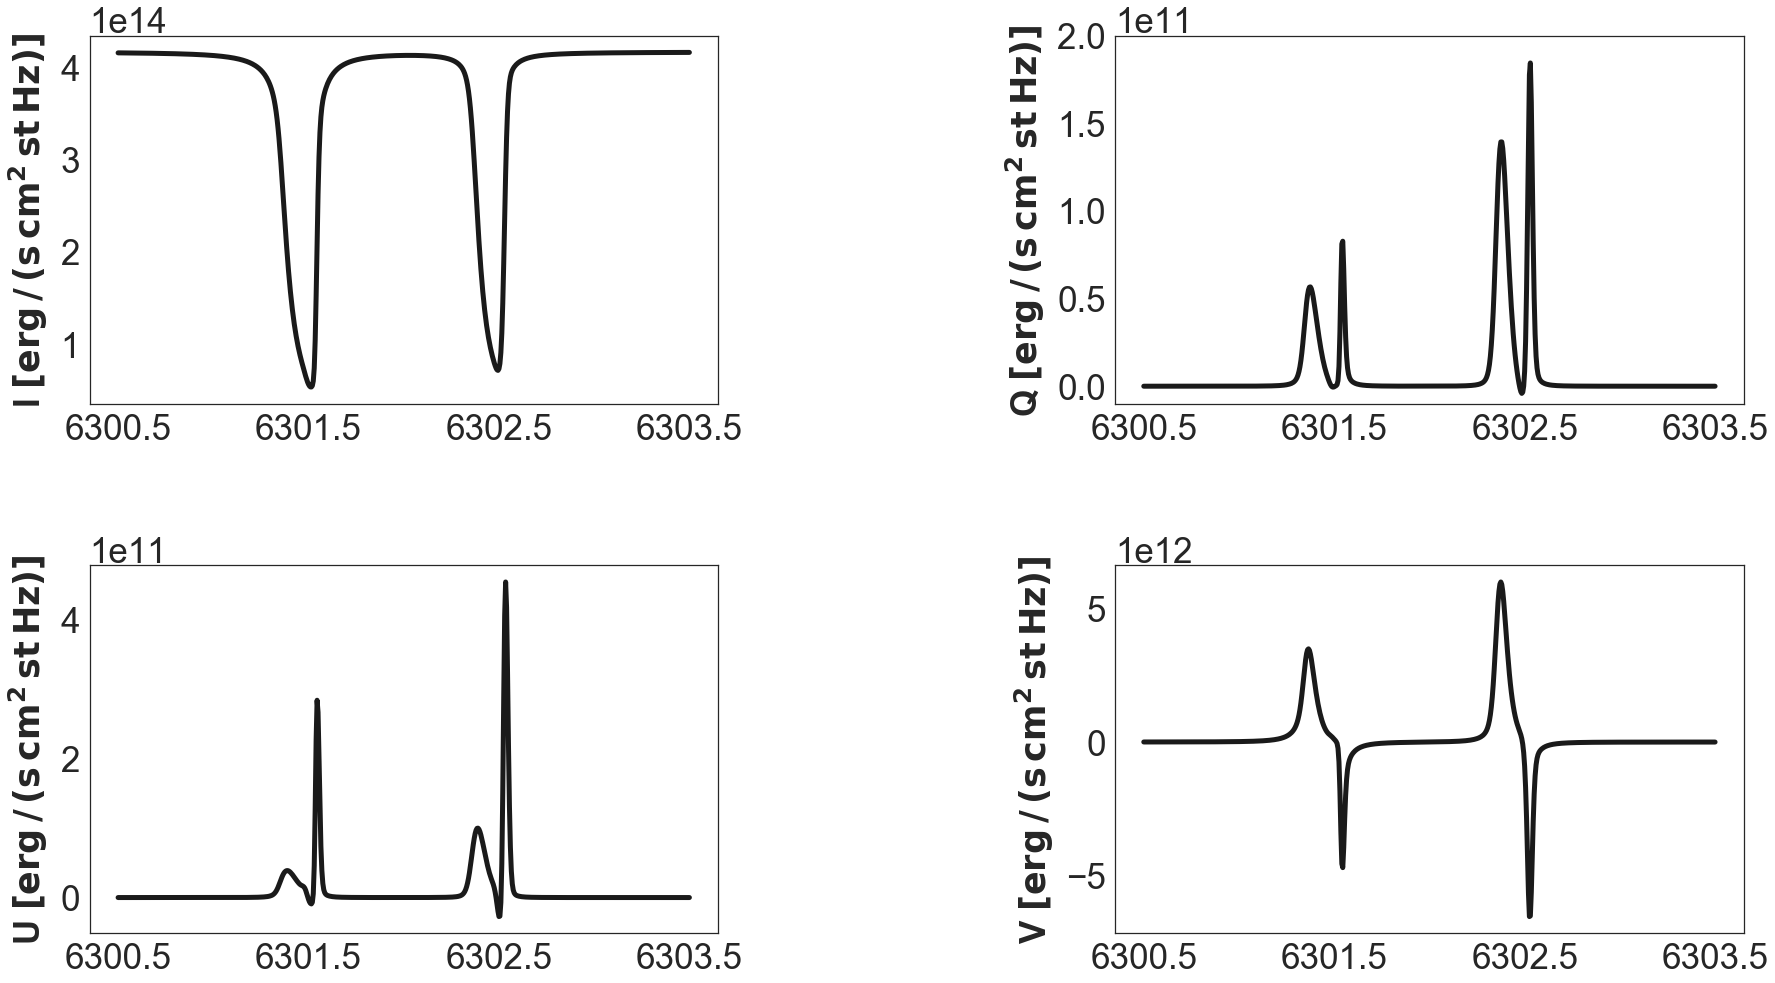

In [18]:
mags = fits.open('models/ivan_models.fits')[0].data
stokes = fits.open('models/ivan_models_synth.fits')[0].data
mags[10,:,:] %= np.pi
x=200
z=200


plt.rcParams.update({'axes.labelsize':35, 'axes.labelweight':'bold', 'axes.labelpad':10,
                    'xtick.labelsize':35, 'ytick.labelsize':35, 'lines.linewidth':5,
                    'legend.fontsize':40, 'axes.formatter.use_mathtext':False,
                    'axes.formatter.limits':(-4,3)})

fig = plt.figure(figsize=(25,18))
plt.subplot(331)
plt.plot(np.arange(61), mags[2,x,z,:], color='k')
plt.ylabel('T [K]')
plt.ylim(3*1e3,10*1e3)

plt.subplot(332)
plt.plot(range(61), mags[3,x,z,:], color='k')
plt.ylabel(r'P [dyn $\, \bf{cm^{-2}}$]')

plt.subplot(333)
plt.plot(range(61), mags[7,x,z,:], color='k')
plt.ylabel(r'|$\bar{\bf{B}}$| [G]')
plt.ylim(30,65)

plt.subplot(335)
plt.plot(range(61), mags[9,x,z,:], color='k')
plt.ylabel(r'V$\bf{_{LOS} \, [cm \, s^{-1}]}$')
plt.ylim(-2*1e5, 7.5*1e5)


plt.subplot(336)
plt.plot(range(61), mags[8,x,z,:], color='k')
plt.ylabel(r'V$\bf{_{mic} \, [cm \, s^{-1}]}$')
plt.yticks(ticks=[2.55, 2.65, 2.75], labels=['2.55', '2.65', '2.75'])
plt.ylim(2.55,2.75)



plt.subplot(338)
plt.plot(range(61), mags[10,x,z,:]/np.pi, color='k')
plt.ylabel(r'$\bf{ \gamma \, \, [\pi/4 \, rad]}$')
plt.ylim(-0.01,0.6)

plt.subplot(339)
plt.plot(range(61), mags[11,x,z,:]/(np.pi/4), color='k')
plt.ylabel(r'$\bf{ \theta \, \, [\pi/4 \, rad]}$')
plt.ylim(-0.01,1.5)

plt.tight_layout(w_pad=6, h_pad=5)
plt.show()


fig = plt.figure(figsize=(25,14))
plt.subplot(221)
plt.plot(np.arange(601), stokes[x,z,0,:], color='k')
plt.xticks(ticks=[0,200,400,600], labels=['6300.5', '6301.5', '6302.5', '6303.5'])
plt.ylabel(r'I $\bf{[erg \, / \, (s \, cm^{2} \, st \, Hz)]}$')


plt.subplot(222)
plt.plot(range(601), stokes[x,z,1,:], color='k')
plt.ylabel(r'Q $\bf{[erg \, / \, (s \, cm^{2} \, st \, Hz)]}$')
plt.xticks(ticks=[0,200,400,600], labels=['6300.5', '6301.5', '6302.5', '6303.5'])
plt.ylim(-0.1e11,2e11)

plt.subplot(223)
plt.plot(range(601), stokes[x,z,2,:], color='k')
plt.xticks(ticks=[0,200,400,600], labels=['6300.5', '6301.5', '6302.5', '6303.5'])
plt.ylabel(r'U $\bf{[erg \, / \, (s \, cm^{2} \, st \, Hz)]}$')


plt.subplot(224)
plt.plot(range(601), stokes[x,z,3,:], color='k')
plt.xticks(ticks=[0,200,400,600], labels=['6300.5', '6301.5', '6302.5', '6303.5'])
plt.ylabel(r'V $\bf{[erg \, / \, (s \, cm^{2} \, st \, Hz)]}$')

plt.tight_layout(w_pad=15, h_pad=5)


